In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [84]:
np.random.seed(42)

In [85]:
def knn(newObservation, referenceData, k=3):
    data = referenceData.iloc[:, :-1]
    labels = referenceData.iloc[:, -1]   
    
    # Gets euclidian distance between new data pt and pts in dataset
    rows = data.shape[0]
    cols = data.columns.size
    distances = np.empty((rows, cols))
    
    for i in range(rows):
        sum = 0
        for j in range(cols):
            sum += np.square(data.iloc[i, j] - newObservation[j])
        distance = np.sqrt(sum)
        
        # 1st column is distance & 2nd column is class label
        distances[i, 0] = distance
        distances[i, 1] = labels.iloc[i]
        
    # Sorts distances by value (least -> greatest)
    distances = distances[np.argsort(distances[:, 0])]
    
    # Gets k closest neighbors and tracks number of occurances of each class
    num_classes = max(distances[:, 1]) + 1
    classes = [0] * int(num_classes)
    for i in range(k):
        class_num = int(distances[i, 1])
        classes[class_num] = int(classes[class_num])+1
        
    # Returns class number with most occurances
    class_count = max(classes)
    class_index = classes.index(class_count)
    return class_index

In [86]:
def run_tests(x_test, y_test, train_df, k=3):
    size = x_test.shape[0]
    correct_preds = 0
    results = [0] * size
    
    for i in range(size):
        result = knn(x_test[i], train_df, k)
        if result == int(y_test[i]):
            correct_preds+=1
        results[i] = result
        
    accuracy_rate = correct_preds/size
    print('Prediction accuracy (using test set) ' + str((correct_preds/size))) 
    return results

In [87]:
#Generate n synthetic samples (not a real dataset, randomly generated)

n=100 #data pts

#Class 0
X1 = np.random.normal(loc=-2.0, scale=2, size=int(n/2))
Y1 = np.random.normal(loc=0, scale=1, size=int(n/2))
#Class 1
X2 = np.random.normal(loc=2.0, scale=2.0, size=int(n/2))
Y2 = np.random.normal(loc=0, scale=1.0, size=int(n/2))

In [88]:
# Adds class labels to dataset
ds = np.empty([n, 3])
size = int(n/2)
for i in range(size):
        ds[i] = [X1[i], Y1[i], 0]
        ds[i+size] = [X2[i], Y2[i], 1]

In [89]:
# Create dataframe and separate training set
x_train, x_test, y_train, y_test = train_test_split(ds[:, :-1], ds[:, -1], test_size=0.2, random_state=0)
train_df = pd.DataFrame({'X1':x_train[:,0], 'X2':x_train[:,1], 'Y':y_train}, columns=['X1', 'X2', 'Y'])

In [90]:
results = run_tests(x_test, y_test, train_df)

Prediction accuracy (using test set) 0.9


Text(0.5, 1.0, 'Actual labels')

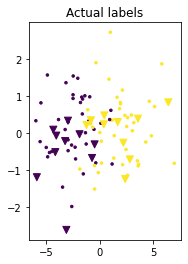

In [91]:
plt.subplot(1, 2, 1)
plt.scatter(x_train[:,0], x_train[:, 1], s=25, c=y_train, marker='.')
plt.scatter(x_test[:,0],x_test[:,1], s=50, c=y_test, marker="v")
plt.title('Actual labels')

Text(0.5, 1.0, 'Predicted labels')

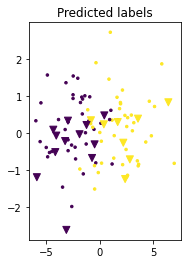

In [92]:
plt.subplot(1, 2, 2)
plt.scatter(x_train[:,0], x_train[:, 1], s=25, c=y_train, marker='.')
plt.scatter(x_test[:,0],x_test[:,1], s=50, c=results, marker="v")
plt.title('Predicted labels')


In [93]:
#Generate n synthetic samples (not a real dataset, randomly generated)

n=1000 #data pts

#Class 0
X1 = np.random.normal(loc=0, scale=3, size=int(n/4))
Y1 = np.random.normal(loc=-3, scale=1, size=int(n/4))
Z1 = np.random.normal(loc=-1, scale=1, size=(int(n/4)))
#Class 1
X2 = np.random.normal(loc=0, scale=3, size=int(n/4))
Y2 = np.random.normal(loc=1, scale=2, size=int(n/4))
Z2 = np.random.normal(loc=1, scale=1, size=(int(n/4)))
#Class 2
X3 = np.random.normal(loc=0, scale=3, size=int(n/4))
Y3 = np.random.normal(loc=3, scale=1, size=int(n/4))
Z3 = np.random.normal(loc=4, scale=1, size=(int(n/4)))
#Class 3
X4 = np.random.normal(loc=0, scale=3, size=int(n/4))
Y4 = np.random.normal(loc=5, scale=3, size=int(n/4))
Z4 = np.random.normal(loc=-3, scale=1, size=(int(n/4)))


In [94]:
# Adds class labels to dataset
ds2 = np.empty([n, 4])
size = int(n/4)
for i in range(size):
        ds2[i] = [X1[i], Y1[i], Z1[i], 0]
        ds2[i+size] = [X2[i], Y2[i], Z2[i], 1]
        ds2[i+int(size*2)] = [X3[i], Y3[i], Z3[i], 2]
        ds2[i+int(size*3)] = [X4[i], Y4[i], Z4[i], 3]



In [95]:
# Create dataframe and separate training set
x_train, x_test, y_train, y_test = train_test_split(ds2[:, :-1], ds2[:, -1], test_size=.2, random_state=0)
train_df2 = pd.DataFrame({'X1':x_train[:,0], 'X2':x_train[:,1], 'X3':x_train[:,2], 'Y':y_train}, columns=['X1', 'X2', 'X3', 'Y'])

In [96]:
results = run_tests(x_test, y_test, train_df2)

Prediction accuracy (using test set) 0.915
